In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [13]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [29]:
x_train.shape

(60000, 28, 28, 1)

In [30]:
x_train = x_train.reshape(60000,28,28,1).astype('float32')/255
x_test = x_test.reshape(10000,28,28,1).astype('float32')/255

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

컨-컨-풀-드-풀-덴-드-덴

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 6)         60        
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 16)        880       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 120)         17400     
                                                                 
 dropout_8 (Dropout)         (None, 3, 3, 120)       

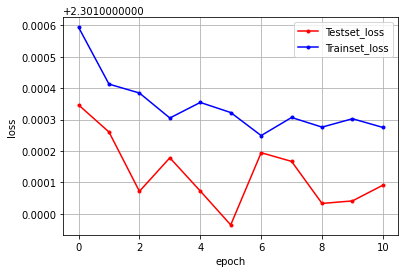

In [44]:
model = Sequential()
model.add(Conv2D(6, kernel_size=(3,3), input_shape = (28,28,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(16, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = 2))
model.add(Conv2D(120, kernel_size = (3,3), activation = 'relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(120, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(84, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

# 모델의 실행
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
